# FAIR and scalable management of small-angle X-ray scattering data  
## Module 3: Data analysis and visualisation
### 3.2: Diffractograms

> Authors: Torsten Giess, Selina Itzigehl, Jan Range, Johanna Bruckner, Juergen Pleiss  
> Last modified: 02.05.2022

---

### **Abstract** <a class="anchor" name="abstract"></a>

Using established packages matplotlib (version 3.5.1) and pandas (version 1.4.1), as well as packages from the Python 3 standard libary, this notebook provides the means to visualize recorded data either directly from the AnIML file or from the respective measurements files. 

---

### **Table of Contents** <a class="anchor" name="table_of_contents"></a>

- [Abstract](#abstract)
- [Workflow](#workflow)
    - [User guide](#user_guide)
    - [Preparation](#preparation)
    - [Diffractograms with Python](#diffs)
- [Disclosure](#disclosure)

---

### **Workflow** <a class="anchor" name="workflow"></a>

Following is the workflow for Module 3.2: Diffractograms with Python of FAIR and scalable management of small-angle X-ray scattering data.

#### **User guide** <a class="anchor" name="user_guide"></a>

This notebook can be used to visualize measured diffractograms in different ways. Two-dimensional diffractograms (measured intensity vs. scattering vector) can be done for single or multiple files directly from AnIML. In additon, three-dimensional plots with temperature- or concentration-dependency can be achieved for raw measurement data.

#### **Preparation** <a class="anchor" name="preparation"></a>

This section contains the necessary preparations for using this module. Code cells in this section are required regardless of which functionality of this notebook is used. First, the required packages from the [Python 3 standard library](https://docs.python.org/3/library/), the Python Package Index ([PyPI](https://pypi.org/)), and *ad hoc* modules of this work are imported. Then, both current time and path are retrieved and stored in the desired formats.

In [ ]:
print("Importing standard library packages.")
from datetime import date
from pathlib import Path
import os
print ("Done.")

In [ ]:
print("Importing PyPI packages.")
from pyaniml import AnIMLDocument
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
print ("Done.")

In [ ]:
print("Importing local packages.")
from modules.seriesreader import SeriesReader
print("All done.")

In [ ]:
date_suffix = str(date.today()).replace("-", "")[2:]

In [ ]:
cwd = Path.cwd()
path_to_datasets = cwd / "./datasets/"

---

#### **Import of data from AniML** <a class="anchor" name="diffs"></a>


Export $q$ and $I$ to TSV for plotting:

In [ ]:
path_to_AnIML_file = path_to_datasets / f"download/fairsaxs_220316.animl"

In [ ]:
with path_to_AnIML_file.open("r") as f:
    xml_string = f.read()
    animl_doc = AnIMLDocument.fromXMLString(xml_string)

In [ ]:
reader = SeriesReader(animl_doc)

In [ ]:
list_of_IDs = reader.available_seriesIDs()
print(list_of_IDs)

In [ ]:
files_to_plot = [file for index, file in enumerate(list_of_IDs) if file.startswith("OTAB")]
print(files_to_plot)

reader.add_seriesID(files_to_plot)
dataframe = reader.create_dataframe()

In [ ]:
path_to_TSV_file = path_to_datasets / f"processed/fairsaxs_220316.tsv"

In [ ]:
dataframe.to_csv(
    path_or_buf=path_to_TSV_file,
    sep="\t",
    index=False
)

---

#### **Diffractograms with Python** <a class="anchor" name="diffs"></a>

lorem ipsum dolor ...

**2D diffractograms**

This section enables creating single two-dimensional diffractograms of all measurements contained in the AnIML file by iterating through the columns in the created TSV file:

In [ ]:
for index in range(0, (len(dataframe.columns)),2):
    data = pd.read_table(path_to_TSV_file,
                      usecols = [index, (index+1)],
                      names = ["q", "I"],
                      header = 1,
                      engine = "python"
                     )
    
    _ = data[data["q"] >= 0.5]
    plot_data = _[_["q"] <= 7]
    
    scattering_vector = plot_data["q"]
    counts_per_area = plot_data["I"]
    
    plt.plot(scattering_vector,
            counts_per_area,
            linestyle = "-",
            marker = ",",
            label = (list(dataframe.columns)[index])[0:-2],
            color = "black")
    plt.xlim(0,7)
    plt.xlabel("$q$ / $\mathrm{nm}^{-1}$")
    plt.yscale("log")
    plt.ylabel("log($I$ / a.u.)")
    plt.legend(frameon=False)
    plt.show()

---
This section allows to create plots with multiple measurements from the AnIML file.

First add the determined phases to `phase`. Then instantiate the figure and add all diffractograms to it. The diffractograms are plotted on a logarithmic scale, therefore, the intensity is scaled by `10**index` and shifted by `index*10**(index/2)` on the y-axis.

In [344]:
phase = ["$\mathrm{L}_{1}$", " ", "$\mathrm{H}_{1}$", " ", "$\mathrm{V}_{1}$", " ", "$\mathrm{L}_{\u03B1}$", " ", "cr"]

['OTAB_078wtp_T060', 'OTAB_082wtp_T025', 'OTAB_078wtp_T058', 'OTAB_093wtp_T025', 'OTAB_100wtp_T095']


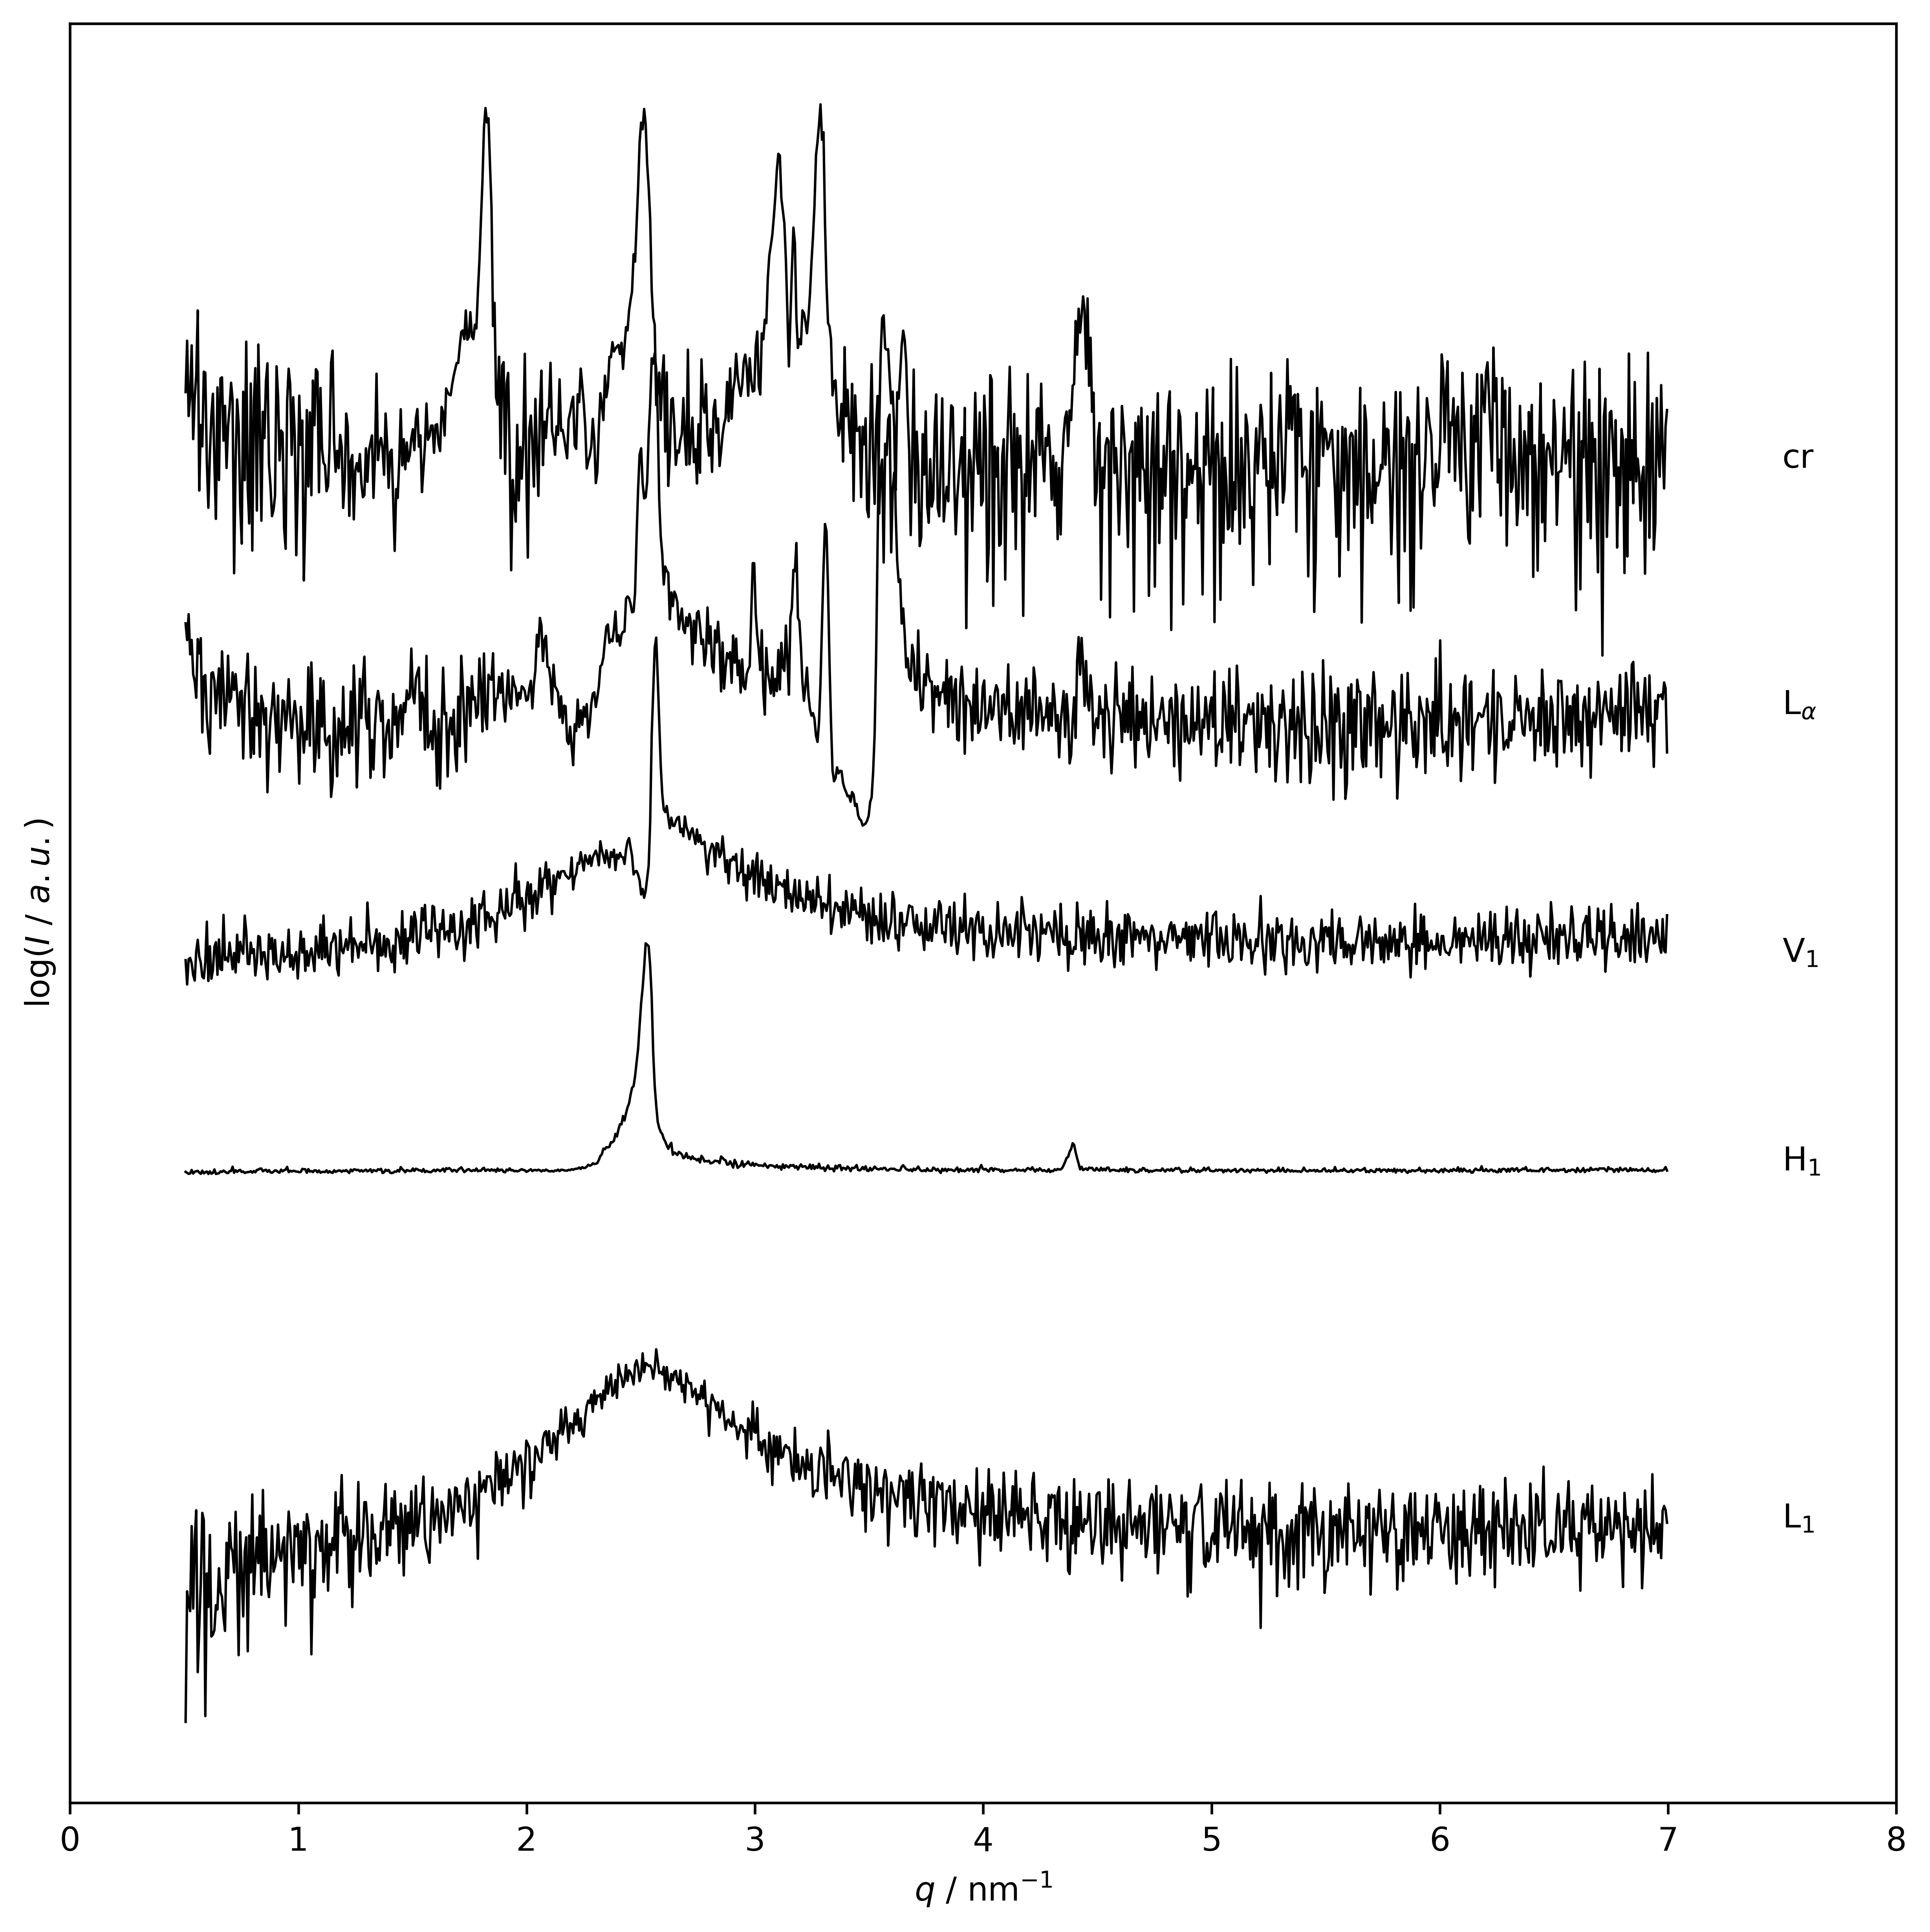

In [348]:
fig = plt.figure(figsize=(10,10), dpi=600)
ax = fig.add_subplot()
ax.set_xlabel("$q$ / $\mathrm{nm}^{-1}$")
ax.set_xlim(0,8)
ax.tick_params(which="both",
               left=False,
               labelleft=False
               )
ax.set_ylabel("log($I$ / $a.u.$)")
ax.set_yscale("log")

for index in range(0, len(dataframe.columns),2):
    data = pd.read_table(path_to_TSV_file,
                      usecols = [index, (index+1)],
                      names = ["q", "I"],
                      header = 1,
                      engine = "python"
                     )
    
    _ = data[data["q"] >= 0.5]
    plot_data = _[_["q"] <= 7]

    scattering_vector = plot_data["q"]
    counts_per_area = ((plot_data["I"]*(10**index)) + (index*10**(index/2)))
    
    ax.plot(scattering_vector,
            counts_per_area,
            marker=",",
            linestyle="-",
            linewidth=0.75,
            color="black"
            )
    ax.text(7.5, (counts_per_area.iloc[-15]), phase[index])
    
plt.show()

**3D diffractograms**

This section enables creating three-dimensional diffractograms with the scattering vector _q_ vs. the concentration _c_ or temperature _T_ and the measured intensitiy _I_.

---

For concentration dependency, go to the measurement folder (`datasets/raw/`) containing the data for visualization and create a list of files:

In [ ]:
path_to_T_series = path_to_datasets / "raw/OTAB_measurement_data/OTAB_000wtp_T025"

In [ ]:
files = path_to_T_series.glob("*.pdh")
meas_files = [file for file in list(files) if file.is_file()]
meas_files.sort(reverse=True)

print([measurement.stem for measurement in meas_files])

Add the measured concentrations to `mass_fractions` and instantiate the `inferno` colormap by storing the number of measurements in `n_meas`. 

In [ ]:
mass_fractions = [10, 20, 30, 40, 50, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 78, 79, 80, 90, 100]
mass_fractions.sort(reverse=True)

In [ ]:
cmap = mpl.cm.gist_rainbow
n_meas = len(meas_files)
print(n_meas)

Instantiate the figure and add all measurements to it:

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.figure.set_size_inches(10, 10)
ax.set_xlabel("$q$ / $\mathrm{nm}^{-1}$")
ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_ylabel("$x$ / wt%")
ax.set_ylim(0, 100)
ax.set_zlabel("$I$ / $a.u.$")

for measurement in range(len(mass_fractions)):
    print(f"Adding {meas_files[measurement].stem} to figure.")

    data = pd.read_table(
        meas_files[measurement],
        delimiter="   ",
        usecols=[0, 1],
        names=["q", "I"],
        header=5,
        skipfooter=496,
        engine="python",
    )

    scattering_vector = data["q"]
    mass_fraction = []
    counts_per_area = data["I"]

    for data_points in range(len(scattering_vector)):
        mass_fraction.insert(data_points, mass_fractions[measurement])

    ax.plot(
        scattering_vector,
        mass_fraction,
        counts_per_area,
        linestyle="-",
        marker=",",
        color=cmap(measurement / float(n_meas)),
    )

plt.show()

---

For temperature dependency, go to the measurement folder (`datasets/raw/`) containing the data for visualization and create a list of files:

In [ ]:
path_to_T_series = path_to_datasets / "raw/OTAB_measurement_data/OTAB_095wtp_T"

In [ ]:
files = path_to_T_series.glob("*.pdh")
meas_files = [file for file in list(files) if file.is_file()]
meas_files.sort(reverse=True)

print([measurement.stem for measurement in meas_files])

Add the measured temperature range and step width to `temperatures` and instantiate the `inferno` colormap: 

In [ ]:
temperatures = [temperature for temperature in range(10, 96, 1)]
temperatures.sort(reverse=True)

In [ ]:
cmap = mpl.cm.inferno.reversed()
n_meas = len(meas_files)
print(n_meas)

Instantiate the figure and add all measurements to it:

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.figure.set_size_inches(10, 10)
ax.set_xlabel("$q$ / $\mathrm{nm}^{-1}$")
ax.xaxis.set_ticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_ylabel("$T$ / °C")
ax.set_ylim(0, 100)
ax.set_zlabel("$I$ / $a.u.$")

for measurement in range(len(temperatures)):
    print(f"Adding {meas_files[measurement].stem} to figure.")

    data = pd.read_table(
        meas_files[measurement],
        delimiter="   ",
        usecols=[0, 1],
        names=["q", "I"],
        header=5,
        skipfooter=496,
        engine="python",
    )

    scattering_vector = data["q"]
    temperature = []
    counts_per_area = data["I"]

    for data_points in range(len(scattering_vector)):
        temperature.insert(data_points, temperatures[measurement])

    ax.plot(
        scattering_vector,
        temperature,
        counts_per_area,
        marker=",",
        color=cmap(measurement / float(n_meas)),
    )
    
plt.show()

---

### **Disclosure** <a class="anchor" name="disclosure"></a>

**Contributions**

If you wish to contribute to the FAIR Chemistry project, find us on [GitHub](https://github.com/FAIRChemistry)!

**MIT License**

Copyright (c) 2022 FAIR Chemistry

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.